<div style="text-align:center; color:blue; font-size:larger;">
    <strong>FOREX FINANCIAL ANALYSIS EUR/USD TREND REVERSALS</strong>
    <br>
    <span style="font-size:smaller; font-style:italic; color:black;">Created by Gildardo Gamino Torres</span>
</div>


*The objective of this project is to identify the highs and lows of the 1-hour candlesticks in the EURUSD currency pair. This allows us to locate possible turning points in the market, thus increasing the probability of successful forex trading by taking advantage of possible trend reversals.*


1.  imported the pandas library to manipulate the data in my DataFrame, and to verify its successful loading, I printed the first 5 values

In [3]:
import pandas as pd
csv_file_name = 'EURUSD1.csv'
data = pd.read_csv(csv_file_name)
print(data.head(4))

                  Gmt time     Open     High      Low    Close  Volume
0  01.01.2020 00:00:00.000  1.12076  1.12076  1.12076  1.12076     0.0
1  01.01.2020 00:01:00.000  1.12076  1.12076  1.12076  1.12076     0.0
2  01.01.2020 00:02:00.000  1.12076  1.12076  1.12076  1.12076     0.0
3  01.01.2020 00:03:00.000  1.12076  1.12076  1.12076  1.12076     0.0


2. Cleaning the data to obtain a new table with 1-hour intervals involves the following steps:
   
    2.1 Adjusting the date and time format for proper manipulation, converting from day-month-year hour:minute:second to year-month-day hour:minute:second.

In [7]:
# Load data from the CSV file into a pandas DataFrame
data = pd.read_csv('EURUSD1.csv')

# Convert the date column to datetime type and set it as the index
data['Gmt time'] = pd.to_datetime(data['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
data.set_index('Gmt time', inplace=True)

# Round the date and time column to remove minutes and seconds
data['Hour'] = data.index.floor('H')


    2.2 Once the date format is corrected, we extract the new table with 1-hour intervals.

In [9]:
data = pd.read_csv('EURUSD1.csv')
data['Gmt time'] = pd.to_datetime(data['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
data.set_index('Gmt time', inplace=True)
data['Hour'] = data.index.floor('H')

# Calculate the opening, highest, lowest, and closing price for each hour
data_1h = data.groupby('Hour').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})

# Display the first records to verify that the data has been filtered correctly
print(data_1h.head(5))

                        Open     High      Low    Close
Hour                                                   
2020-01-01 00:00:00  1.12076  1.12076  1.12076  1.12076
2020-01-01 01:00:00  1.12076  1.12076  1.12076  1.12076
2020-01-01 02:00:00  1.12076  1.12076  1.12076  1.12076
2020-01-01 03:00:00  1.12076  1.12076  1.12076  1.12076
2020-01-01 04:00:00  1.12076  1.12076  1.12076  1.12076


In [ ]:
3. Given that there are various market hours in forex trading, the London session has been identified as one of the most active (8 a.m. - 4 p.m.). Within this timeframe, we'll group the most frequent highs and lows. Then, we'll extract and print the top 5 most repeated highs and lows, along with their count and value.

In [11]:
# Filter data for the London session (8 a.m. - 4 p.m.)
london_session_data = data.between_time('08:00', '16:00')

# Count the occurrences of the most repeated values in the High and Low columns.
high_counts = london_session_data['High'].value_counts().head(15)
low_counts = london_session_data['Low'].value_counts().head(15)

# Print the 15 most repeated values in the High and Low columns together with their counts.
print("Top 15 most repeated highs:")
print(high_counts)
print("\nTop 15 most repeated lows:")
print(low_counts)


Top 15 most repeated highs:
High
1.21922    1450
1.18310    1000
1.18453     997
1.18248     996
1.08371     992
1.18414     991
1.18385     990
1.08456     989
1.18700     989
1.18371     989
1.07955     988
1.17949     986
1.08711     985
1.17862     983
1.18544     983
Name: count, dtype: int64

Top 15 most repeated lows:
Low
1.21922    1450
1.18310    1004
1.18385     996
1.18248     993
1.18371     989
1.18414     988
1.07955     987
1.08371     985
1.18572     982
1.08456     982
1.08711     982
1.18700     981
1.10251     981
1.18544     981
1.17949     980
Name: count, dtype: int64


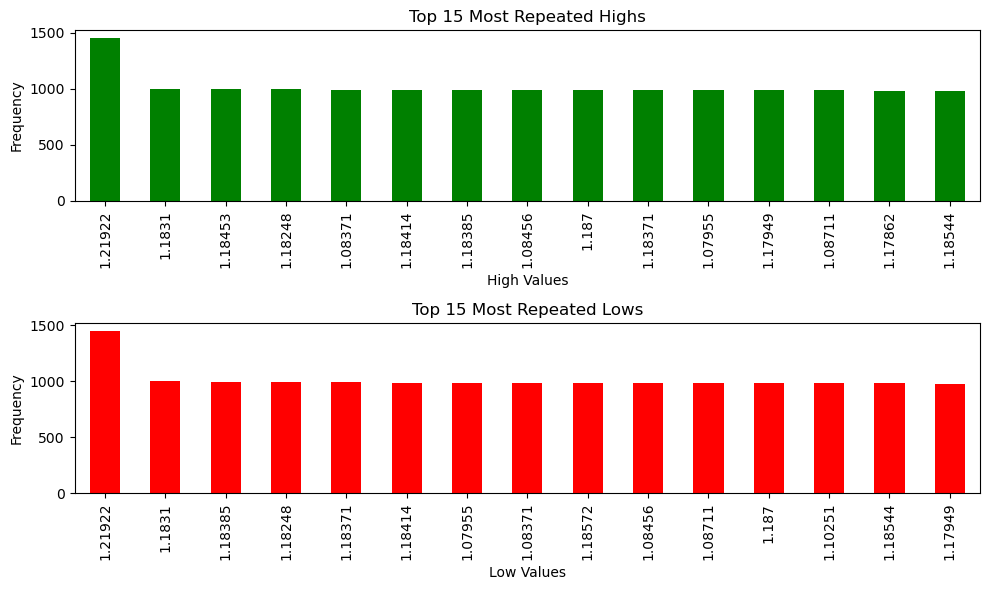

In [96]:
import matplotlib.pyplot as plt

# Plot the most repeated values in the High and Low columns
plt.figure(figsize=(10, 6))

# Plot the most repeated values in High
plt.subplot(2, 1, 1)
high_counts.plot(kind='bar', color='green')
plt.title('Top 15 Most Repeated Highs')
plt.xlabel('High Values')
plt.ylabel('Frequency')

# Plot the most repeated values in Low
plt.subplot(2, 1, 2)
low_counts.plot(kind='bar', color='red')
plt.title('Top 15 Most Repeated Lows')
plt.xlabel('Low Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


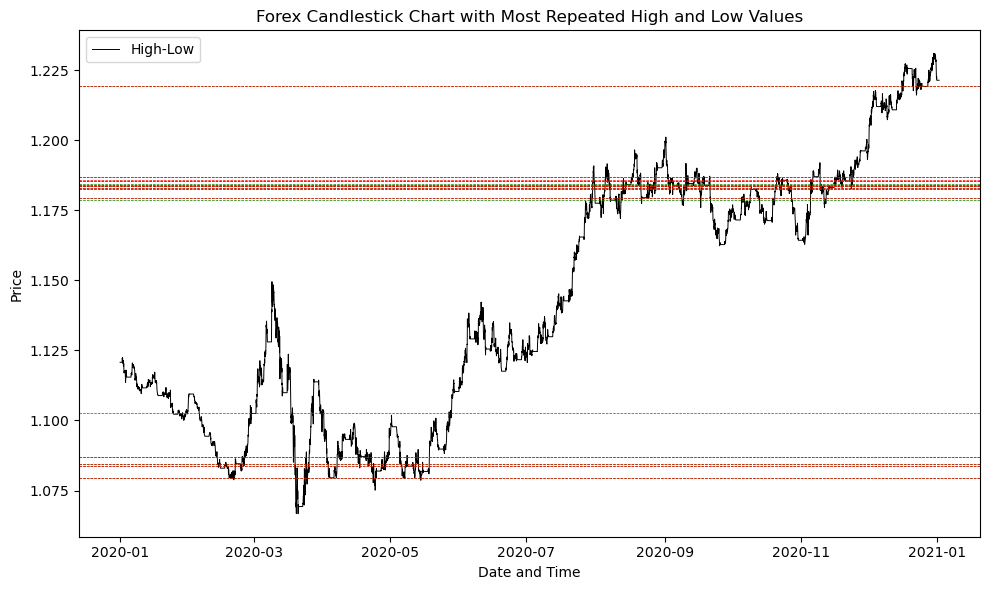

In [12]:
import matplotlib.pyplot as plt

#Create a figure and axes
plt.figure(figsize=(10, 6))

#Plot a line connecting the points High and Low
plt.plot(data_1h.index, data_1h['High'], marker='', linestyle='-', markersize=2, label='High-Low', color='black', linewidth=0.7)

#Add horizontal lines for the most repeated values of High
for value in high_counts.index:
    plt.axhline(y=value, color='green', linestyle='--', linewidth=0.5)

#Add horizontal lines for the most repeated values of low
for value in low_counts.index:
    plt.axhline(y=value, color='red', linestyle='--', linewidth=0.5)

#Add title and tags
plt.title('Forex Candlestick Chart with Most Repeated High and Low Values')
plt.xlabel('Date and Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()



Thanks to the identification of the most repeated values at the opening of the London session within our dataset, we have been able to observe the presence of points that, as shown in the graph, repeat over time. These points hold significant meaning and can be considered as key levels in market analysis. Taking these levels into account in future trades can be highly beneficial, as they provide important reference points for decision-making in the financial market